In [34]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Import the dataset and take a look at the beginning of the data.
df = pd.read_csv("diabetes_dirty.csv")
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [36]:
#Checking for missing data
df.isnull().sum()

AGE            0
SEX            0
BMI            0
BP             0
S1             0
S2             0
S3             0
S4             0
S5             0
S6             0
PROGRESSION    0
dtype: int64

In [37]:
# Preparing the data for multiple linear regression

# Features (columns: AGE, SEX, BMI, BP, S1, S2, S3, S4, S5, S6) 
X_feature = df.drop("PROGRESSION", axis = 1) # Input matrix

# PROGRESSION as the target variable (y)
y_target = df['PROGRESSION'] # target/output vector

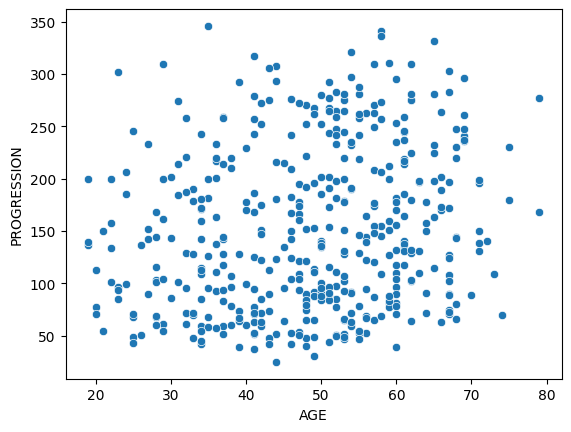

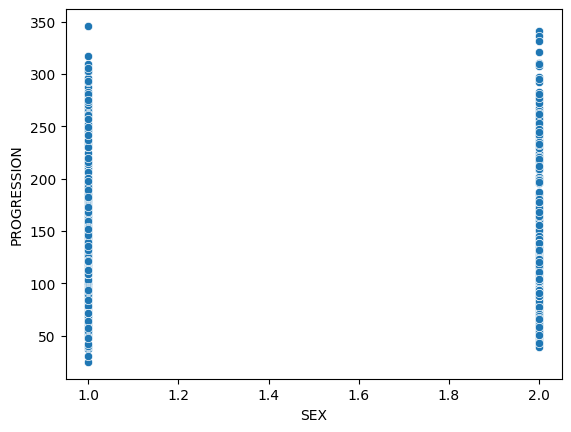

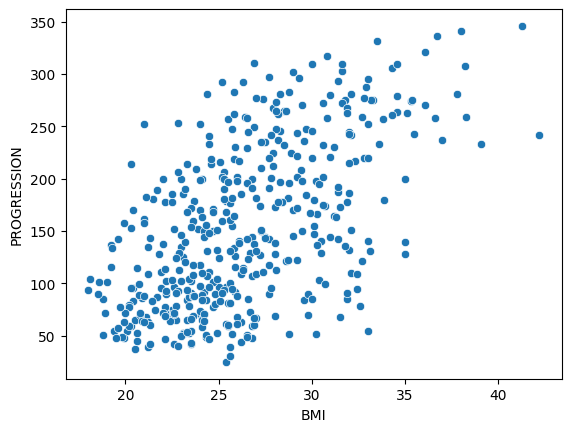

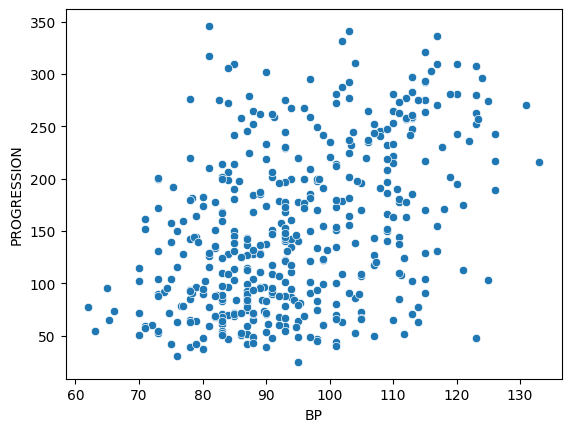

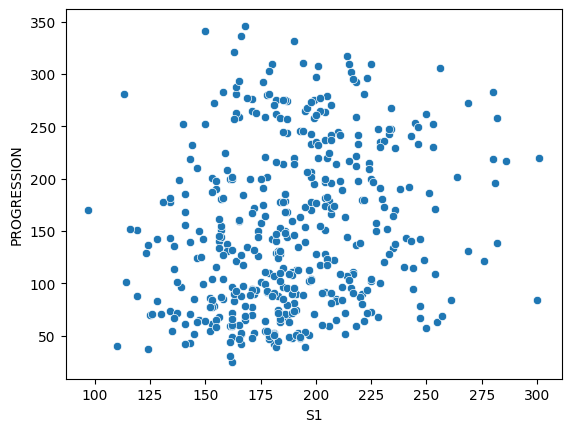

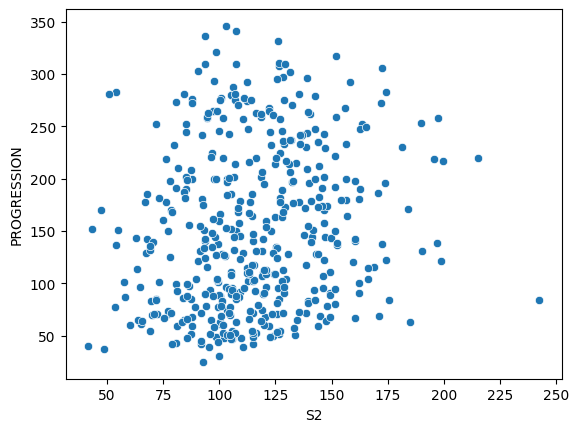

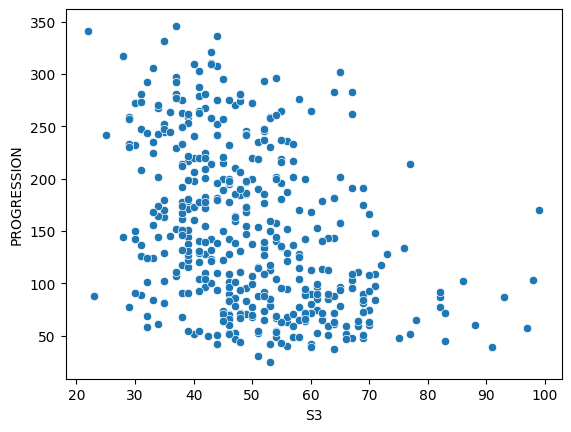

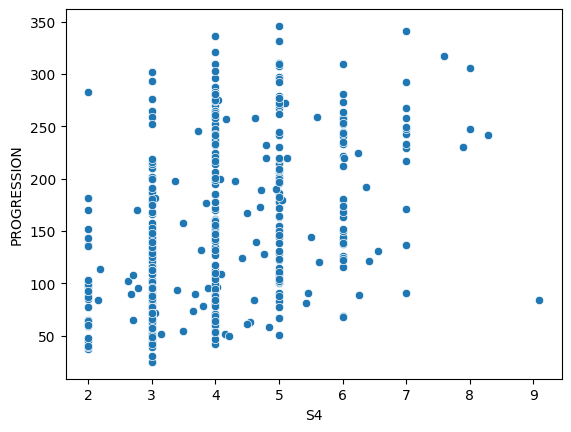

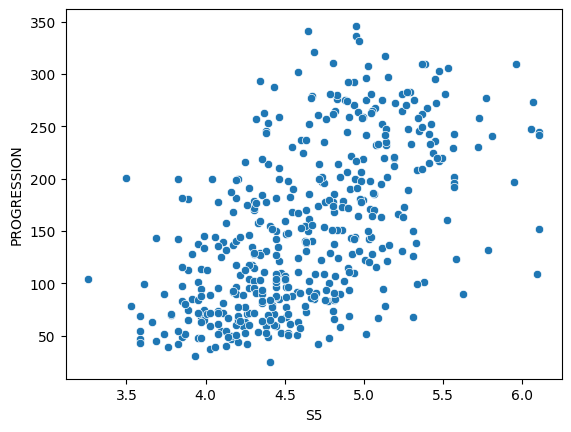

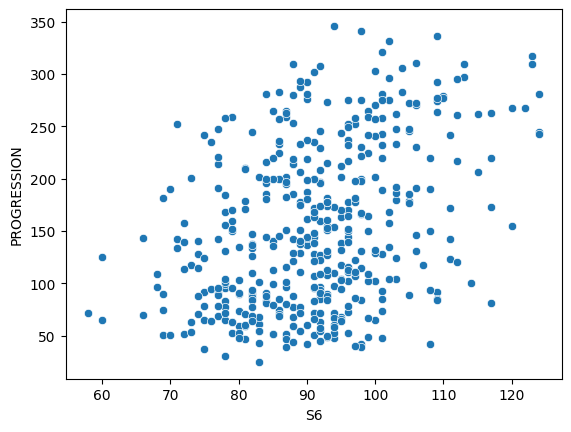

In [38]:
# Scatterplots to see correlation between PROGRESSION (target) and features
for col in X_feature.columns:
  sns.scatterplot(data = X_feature, x = col, y = y_target)
  plt.show()

<Axes: >

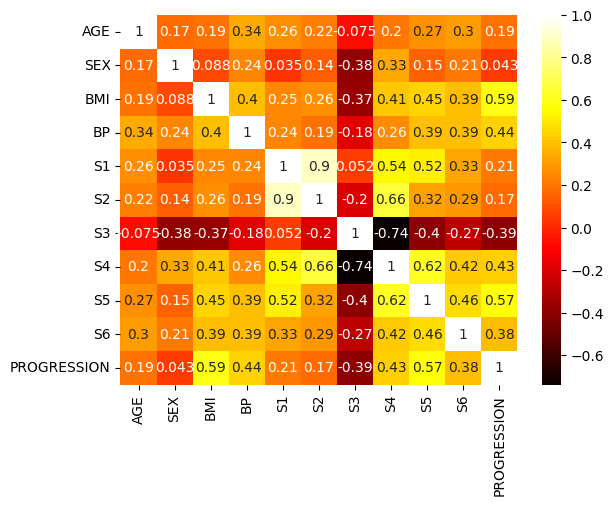

In [39]:
# Looking at original data with heatmap to see correlations 
sns.heatmap(df.corr(), annot = True, cmap="hot")

In [40]:
# Anything below 0.3 will be dropped as it's weakly correlated
# Updating Feature matrix by dropping AGE, S1, S2, and S3
X_feature = X_feature.drop(['AGE', 'S1', 'S2', 'S3'], axis=1)

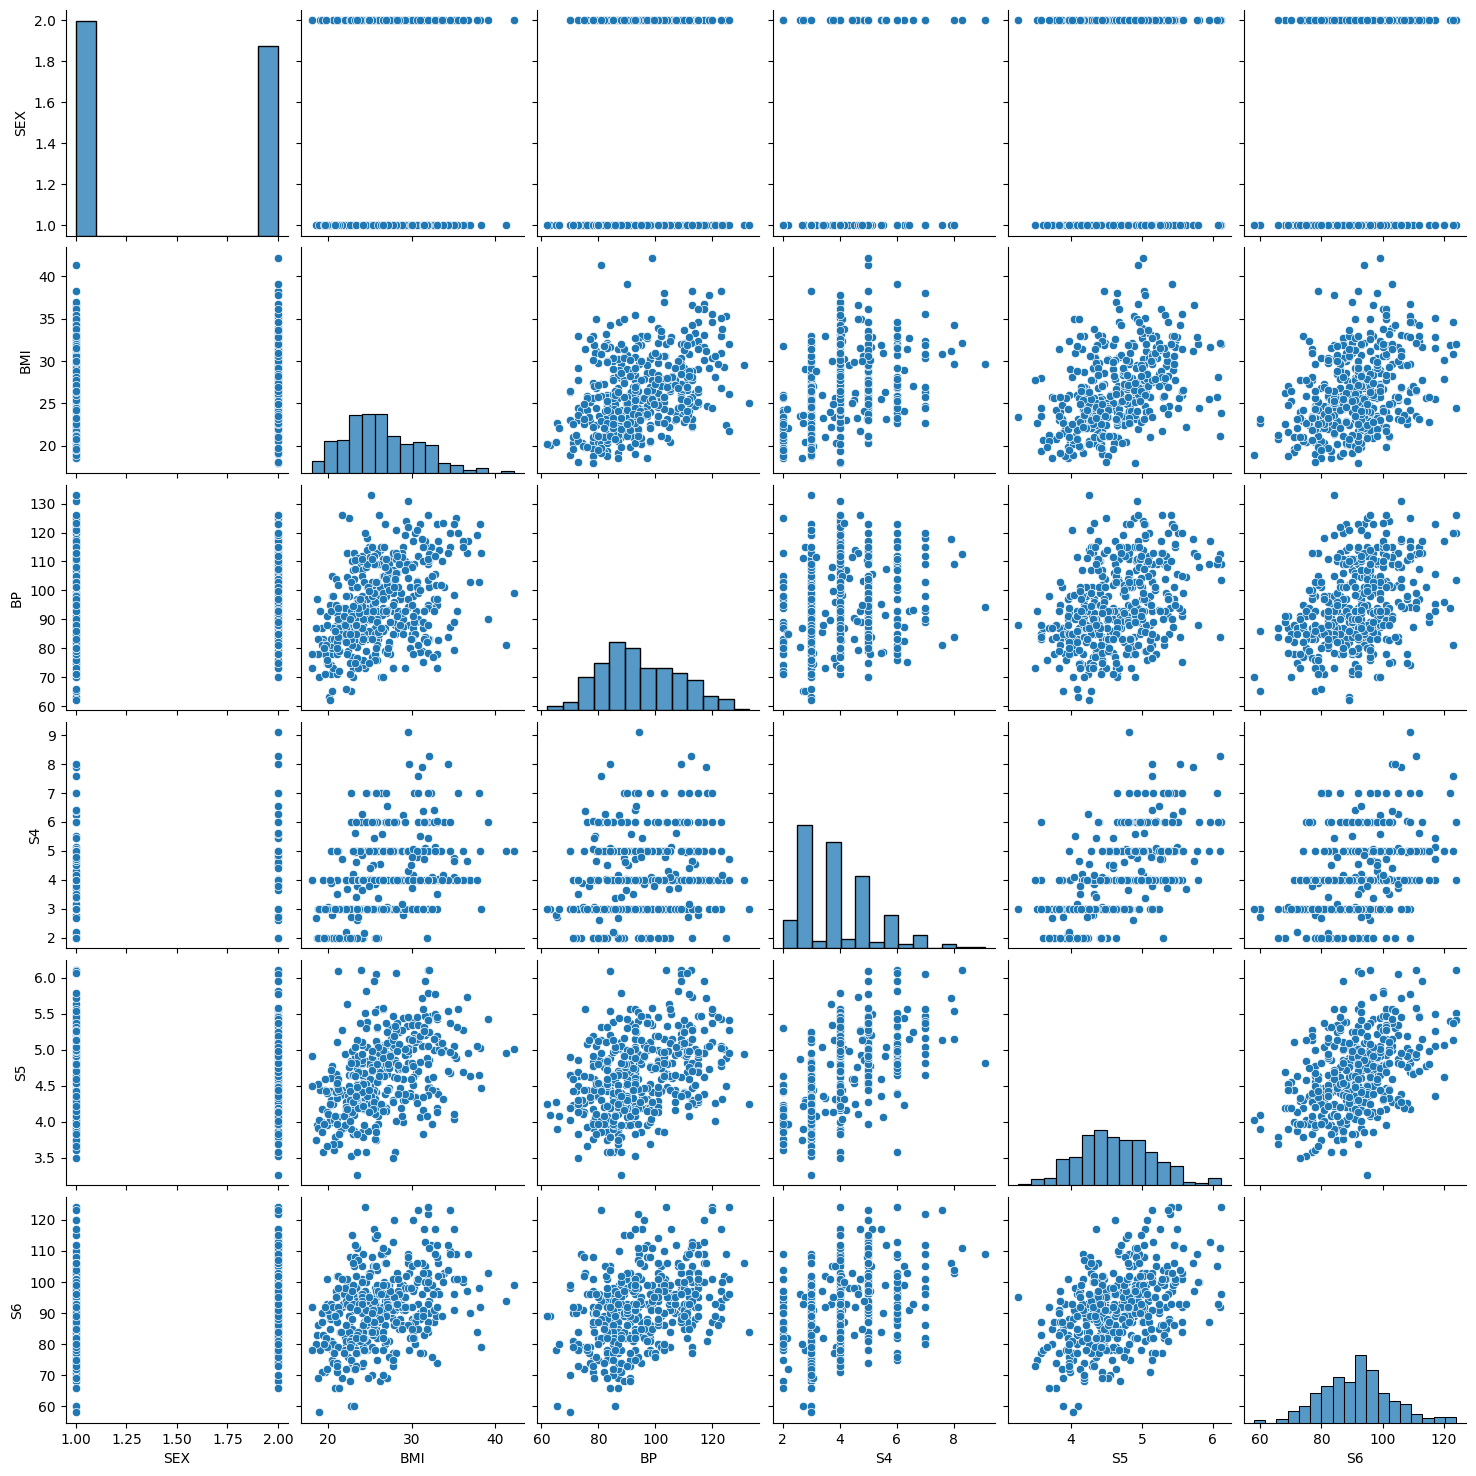

In [41]:
# Plot the distribution of the data
sns.pairplot(data=X_feature)

In [42]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=42)

# Printing out Training data and test data shapes
print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (353, 6) (353,)
Test data: (89, 6) (89,)


In [43]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [44]:
# Train your multiple linear regression model
multi_model = LinearRegression()
multi_model.fit(X_train_scaled, y_train)

print('Intercept:', train_model.intercept_)  # Print the intercept of the trained model
print('Coefficients:', train_model.coef_)    # Print the coefficients of the trained model

Intercept: 153.73654390934843
Coefficients: [-8.10693843 28.19917081 15.35380614  7.53579993 19.37137968  2.07494525]


In [45]:
# Predict PROGRESSION using the test model and scaled test data
y_pred = multi_model.predict(X_test_scaled)

In [46]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("Model R^2 Score:", r2)

# R-squared
# Measures the goodness of fit of the model.
# A higher R-squared reflects a better fit, while a lower value suggests lesser explanatory power.
# It helps compare models and assess predictive performance.

Model R^2 Score: 0.46786418217489634
